# import required libraries

In [1]:
import statistics as stat
import scipy.stats as ss 
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib.image as image
import requests 
import pandas as pd
import seaborn as sns

# Create required data sets for assignments 

In [2]:
# sales data frame
sales = pd.read_csv("sales.csv")

In [3]:
# tips data frame
tips = sns.load_dataset('tips')

In [4]:
# Countries data frame 
resp = requests.get("https://restcountries.eu/rest/v2/all")
countries = pd.DataFrame(resp.json())

# 09-JAN-2020

### Create a list with salaries and display mean, median, variance and standard deviation. Divide data into 4 subsets, print all four subsets.

In [5]:
salaries = [30000,50000,60000,35000,45000]

In [6]:
print( stat.mean(salaries), stat.median(salaries), stat.variance(salaries), stat.stdev(salaries))

44000 45000 142500000 11937.336386313322


In [7]:
q1,q2,q3 = np.percentile(salaries,q = [25,50,75])

In [8]:
q1,q2,q3

(35000.0, 45000.0, 50000.0)

In [9]:
# First part is everything <= q1
for s in salaries:
     if  s <= q1:
       print(s)

30000
35000


In [10]:
# Second part is everything > q1 and <= q2
for s in salaries:
     if  s > q1 and s <= q2:
       print(s)

45000


In [11]:
# Third part is everything > q2 and <= q3
for s in salaries:
     if  s > q2 and s <= q3:
       print(s)

50000


In [12]:
# Fourth part is everything > q3
for s in salaries:
     if  s > q3:
       print(s)

60000


# 10-JAN-2020

### For salaries data, display outliers on both sides

In [13]:
salaries = [300000,500000,600000,350000,450000,10000,4000000,200000,50000000]

In [14]:
# calculate iqr
iqr = ss.iqr(salaries)
q1,q3  = np.percentile(salaries,(25,75))
print(iqr,q1,q3)

300000.0 300000.0 600000.0


In [15]:
# calculate lower limit and upper limit for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(lower,upper)

-150000.0 1050000.0


In [16]:
for s in salaries:
    if s < lower or s > upper:
         print(s)

4000000
50000000


### Read (any) data from file and display mean, median, variance and standard deviation. 

In [17]:
# Open file salaries.txt and read data from it. It contains one salary per row
f = open("salaries.txt","rt") 
salaries = []
for line in f:
    salaries.append(int(line.strip("\n")))    # Strip new line and add line after converting it to int

In [18]:
print(stat.mean(salaries), stat.median(salaries), stat.variance(salaries), stat.stdev(salaries))

2681250 530000.0 12652698214285.715 3557063.144545752


# 20-JAN-2020

### Take an array with 10000 elements and fill it with random numbers. Find mean in Python'way and in nympy way. Use timeit magic operation to find out how much time it takes

In [19]:
a = np.random.randint(1,100,10000)

In [20]:
%%timeit -n 10 -r 10
avg = sum(a) / len(a) 

2.04 ms ± 171 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [21]:
%%timeit -n 10 -r 10
avg = a.mean()

42.8 µs ± 7.03 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


 ### Get the sum of each row of a random matrix.

In [22]:
a = np.random.randint(1,10, (5,5))

In [23]:
a

array([[4, 2, 9, 4, 4],
       [3, 8, 6, 5, 2],
       [5, 5, 3, 7, 4],
       [4, 3, 8, 7, 9],
       [4, 6, 3, 5, 2]])

In [24]:
for row in a:
     print(row.sum())

23
24
24
31
20


 ### Create an array of years and select only leap years from the array.

In [25]:
years = np.random.randint(1900,2000,100)

In [26]:
def isleap(y):
    return  y % 4 == 0 and y % 100 != 0 or y % 400 == 0

In [27]:
for y in sorted(years):
    if isleap(y):
        print(y)

1908
1912
1920
1920
1924
1928
1928
1932
1932
1932
1940
1944
1948
1948
1952
1952
1952
1960
1964
1964
1968
1972
1976
1980
1984
1988
1992
1992
1996


# 21-JAN-2020

### Display marks and the corresponding roll numbers that are more than the avg marks.

In [28]:
marks = np.random.randint(1,100,20)

In [29]:
marks

array([ 5, 37, 30, 63, 11, 17, 83, 45, 51, 66, 86, 15, 58,  1,  7, 64, 69,
       51, 73, 66])

In [30]:
avgmarks = marks.mean()
for i,m in enumerate(marks):
    if m > avgmarks:
        print(f"{i:2d} {m:3d}")

 3  63
 6  83
 7  45
 8  51
 9  66
10  86
12  58
15  64
16  69
17  51
18  73
19  66


### Display cumsum(), argmin(), argmax() of marks.

In [31]:
marks.cumsum()

array([  5,  42,  72, 135, 146, 163, 246, 291, 342, 408, 494, 509, 567,
       568, 575, 639, 708, 759, 832, 898], dtype=int32)

In [32]:
marks.argmin(), marks.argmax()

(13, 10)

### Bring an image and display the center of the image.

In [33]:
# Load an image from file 


In [34]:
car = image.imread("car.jpg")

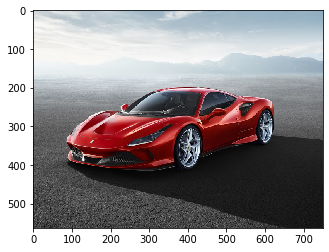

In [35]:
plt.imshow(car)

In [36]:
rows,cols,_ = car.shape

In [37]:
# calculate center of the image
start_row =  rows // 4
end_row = rows  - rows // 4
start_col =  cols // 4
end_col = cols  - cols // 4

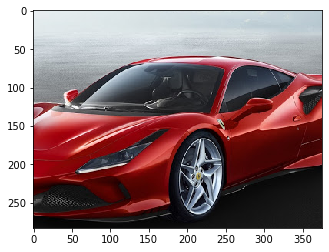

In [38]:
plt.imshow(car[start_row:end_row, start_col:end_col,:])

### Take an image and swap red and green colors.

In [39]:
newcar = car.copy()

In [40]:
for r in newcar:   # Take each row
    for c in r:     # Take each col in row
        c[0], c[1] = c[1],c[0]     # Swap red with green

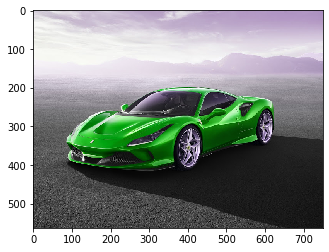

In [41]:
plt.imshow(newcar)

### Create a series with a set of names.(we can settle for default index). Display all elements in the series where the name contains a digit.

In [42]:
import pandas as pd

In [43]:
langs = pd.Series( ['Java','Java13','C#','Python','Python3','JavaScript','TypeScript3'])

In [44]:
# Returns true if string s has any digit otherwise false 
def has_digit(s):
    for c in s:
        if c.isdigit():
            return True
    else:
        return False    

In [45]:
langs [langs.apply(has_digit)]

1         Java13
4        Python3
6    TypeScript3
dtype: object

# 24-JAN-2020

In [46]:
import seaborn as sns

In [47]:
tips = sns.load_dataset('tips')

### Display transactions related to Sunday.

In [48]:
tips[ tips.day == 'Sun']

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


### Display transactions of Saturday by female.

In [49]:
tips[ (tips.day == 'Sat') & (tips.sex == 'Female') ]

,total_bill,tip,sex,smoker,day,time,size
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
29,19.65,3.00,Female,No,Sat,Dinner,2
32,15.06,3.00,Female,No,Sat,Dinner,2
33,20.69,2.45,Female,No,Sat,Dinner,4
37,16.93,3.07,Female,No,Sat,Dinner,3
57,26.41,1.50,Female,No,Sat,Dinner,2
66,16.45,2.47,Female,No,Sat,Dinner,2
67,3.07,1.00,Female,Yes,Sat,Dinner,1
71,17.07,3.00,Female,No,Sat,Dinner,3


### Display where total_bill is more than 20 or tip amount is more than 3

In [50]:
tips[ (tips.total_bill > 20)  | (tips.tip > 3) ]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


### Select total_bill, tip and table size for all Lunches.

In [51]:
tips.loc [ tips.time == 'Lunch', ['total_bill','tip','size']]

,total_bill,tip,size
77,27.20,4.00,4
78,22.76,3.00,2
79,17.29,2.71,2
80,19.44,3.00,2
81,16.66,3.40,2
...,...,...,...
222,8.58,1.92,1
223,15.98,3.00,3
224,13.42,1.58,2
225,16.27,2.50,2


### Display columns where column name contains letter 's'

In [52]:
tips.filter(regex='s')

,sex,smoker,size
0,Female,No,2
1,Male,No,3
2,Male,No,3
3,Male,No,2
4,Female,No,4
...,...,...,...
239,Male,No,3
240,Female,Yes,2
241,Male,Yes,2
242,Male,No,2


### Display top 10 tip amounts

In [53]:
tips.tip.nlargest(10)

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
183     6.50
214     6.50
47      6.00
239     5.92
88      5.85
Name: tip, dtype: float64

### Display all rows where the bill amount is in top 5.

In [54]:
tips.iloc[tips.total_bill.nlargest(5).index]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


# 27-JAN-2020

### Display countries in which we have more than one space in country name.

In [55]:
countries [countries.name.str.count(" ") > 1]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
9,Antigua and Barbuda,[.ag],AG,ATG,[1268],Saint John's,[AG],Americas,Caribbean,86295,...,[UTC-04:00],[],Antigua and Barbuda,028,"[{'code': 'XCD', 'name': 'East Caribbean dolla...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Antigua und Barbuda', 'es': 'Antigua y...",https://restcountries.eu/data/atg.svg,"[{'acronym': 'CARICOM', 'name': 'Caribbean Com...",ANT
26,Bolivia (Plurinational State of),[.bo],BO,BOL,[591],Sucre,"[BO, Buliwya, Wuliwya, Plurinational State of ...",Americas,South America,10985059,...,[UTC-04:00],"[ARG, BRA, CHL, PRY, PER]",Bolivia,068,"[{'code': 'BOB', 'name': 'Bolivian boliviano',...","[{'iso639_1': 'es', 'iso639_2': 'spa', 'name':...","{'de': 'Bolivien', 'es': 'Bolivia', 'fr': 'Bol...",https://restcountries.eu/data/bol.svg,"[{'acronym': 'USAN', 'name': 'Union of South A...",BOL
27,"Bonaire, Sint Eustatius and Saba","[.an, .nl]",BQ,BES,[5997],Kralendijk,"[BQ, Boneiru]",Americas,Caribbean,17408,...,[UTC-04:00],[],Bonaire,535,"[{'code': 'USD', 'name': 'United States dollar...","[{'iso639_1': 'nl', 'iso639_2': 'nld', 'name':...","{'de': 'Bonaire, Sint Eustatius und Saba', 'es...",https://restcountries.eu/data/bes.svg,[],None
28,Bosnia and Herzegovina,[.ba],BA,BIH,[387],Sarajevo,"[BA, Bosnia-Herzegovina, Босна и Херцеговина]",Europe,Southern Europe,3531159,...,[UTC+01:00],"[HRV, MNE, SRB]",Bosna i Hercegovina,070,"[{'code': 'BAM', 'name': 'Bosnia and Herzegovi...","[{'iso639_1': 'bs', 'iso639_2': 'bos', 'name':...","{'de': 'Bosnien und Herzegowina', 'es': 'Bosni...",https://restcountries.eu/data/bih.svg,"[{'acronym': 'CEFTA', 'name': 'Central Europea...",BIH
32,British Indian Ocean Territory,[.io],IO,IOT,[246],Diego Garcia,[IO],Africa,Eastern Africa,3000,...,[UTC+06:00],[],British Indian Ocean Territory,086,"[{'code': 'USD', 'name': 'United States dollar...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",{'de': 'Britisches Territorium im Indischen Oz...,https://restcountries.eu/data/iot.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",
33,United States Minor Outlying Islands,[.us],UM,UMI,[],,[UM],Americas,Northern America,300,...,"[UTC-11:00, UTC-10:00, UTC+12:00]",[],United States Minor Outlying Islands,581,"[{'code': 'USD', 'name': 'United States Dollar...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",{'de': 'Kleinere Inselbesitzungen der Vereinig...,https://restcountries.eu/data/umi.svg,[],
34,Virgin Islands (British),[.vg],VG,VGB,[1284],Road Town,[VG],Americas,Caribbean,28514,...,[UTC-04:00],[],British Virgin Islands,092,"[{'code': None, 'name': '[D]', 'symbol': '$'},...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Britische Jungferninseln', 'es': 'Isla...",https://restcountries.eu/data/vgb.svg,[],IVB
35,Virgin Islands (U.S.),[.vi],VI,VIR,[1 340],Charlotte Amalie,"[VI, USVI, American Virgin Islands, U.S. Virgi...",Americas,Caribbean,114743,...,[UTC-04:00],[],Virgin Islands of the United States,850,"[{'code': 'USD', 'name': 'United States dollar...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Amerikanische Jungferninseln', 'es': '...",https://restcountries.eu/data/vir.svg,[],ISV
45,Central African Republic,[.cf],CF,CAF,[236],Bangui,"[CF, Central African Republic, République cent...",Africa,Middle Africa,4998000,...,[UTC+01:00],"[CMR, TCD, COD, COG, SSD, SDN]",Ködörösêse tî Bêafrîka,140,"[{'code': 'XAF', 'name': 'Central African CFA ...","[{'iso639_1': 'fr', 'iso639_2': 'fra', 'name':...","{'de': 'Zentralafrikanische Republik', 'es': '...",https://restcountries.eu/data/caf.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",CAF
50,Cocos (Keeling) Islands,[.cc],CC,CCK,[61],West Island,"[CC, Territory of the Cocos (Keeling) Islands,...",Oceania,Australia and New Zealand,550,...,[UTC+06:30],[],Cocos (Keeling) Islands,166,"[{'code': '

### Display country name, capital, population for countries where country code contains " i " (alpha3 code)

In [56]:
countries [ countries.alpha3Code.str.contains("I")]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
7,Anguilla,[.ai],AI,AIA,[1264],The Valley,[AI],Americas,Caribbean,13452,...,[UTC-04:00],[],Anguilla,660,"[{'code': 'XCD', 'name': 'East Caribbean dolla...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Anguilla', 'es': 'Anguilla', 'fr': 'An...",https://restcountries.eu/data/aia.svg,[],
28,Bosnia and Herzegovina,[.ba],BA,BIH,[387],Sarajevo,"[BA, Bosnia-Herzegovina, Босна и Херцеговина]",Europe,Southern Europe,3531159,...,[UTC+01:00],"[HRV, MNE, SRB]",Bosna i Hercegovina,070,"[{'code': 'BAM', 'name': 'Bosnia and Herzegovi...","[{'iso639_1': 'bs', 'iso639_2': 'bos', 'name':...","{'de': 'Bosnien und Herzegowina', 'es': 'Bosni...",https://restcountries.eu/data/bih.svg,"[{'acronym': 'CEFTA', 'name': 'Central Europea...",BIH
32,British Indian Ocean Territory,[.io],IO,IOT,[246],Diego Garcia,[IO],Africa,Eastern Africa,3000,...,[UTC+06:00],[],British Indian Ocean Territory,086,"[{'code': 'USD', 'name': 'United States dollar...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",{'de': 'Britisches Territorium im Indischen Oz...,https://restcountries.eu/data/iot.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",
33,United States Minor Outlying Islands,[.us],UM,UMI,[],,[UM],Americas,Northern America,300,...,"[UTC-11:00, UTC-10:00, UTC+12:00]",[],United States Minor Outlying Islands,581,"[{'code': 'USD', 'name': 'United States Dollar...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",{'de': 'Kleinere Inselbesitzungen der Vereinig...,https://restcountries.eu/data/umi.svg,[],
35,Virgin Islands (U.S.),[.vi],VI,VIR,[1 340],Charlotte Amalie,"[VI, USVI, American Virgin Islands, U.S. Virgi...",Americas,Caribbean,114743,...,[UTC-04:00],[],Virgin Islands of the United States,850,"[{'code': 'USD', 'name': 'United States dollar...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Amerikanische Jungferninseln', 'es': '...",https://restcountries.eu/data/vir.svg,[],ISV
39,Burundi,[.bi],BI,BDI,[257],Bujumbura,"[BI, Republic of Burundi, Republika y'Uburundi...",Africa,Eastern Africa,10114505,...,[UTC+02:00],"[COD, RWA, TZA]",Burundi,108,"[{'code': 'BIF', 'name': 'Burundian franc', 's...","[{'iso639_1': 'fr', 'iso639_2': 'fra', 'name':...","{'de': 'Burundi', 'es': 'Burundi', 'fr': 'Buru...",https://restcountries.eu/data/bdi.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",BDI
56,Costa Rica,[.cr],CR,CRI,[506],San José,"[CR, Republic of Costa Rica, República de Cost...",Americas,Central America,4890379,...,[UTC-06:00],"[NIC, PAN]",Costa Rica,188,"[{'code': 'CRC', 'name': 'Costa Rican colón', ...","[{'iso639_1': 'es', 'iso639_2': 'spa', 'name':...","{'de': 'Costa Rica', 'es': 'Costa Rica', 'fr':...",https://restcountries.eu/data/cri.svg,"[{'acronym': 'CAIS', 'name': 'Central American...",CRC
63,Djibouti,[.dj],DJ,DJI,[253],Djibouti,"[DJ, Jabuuti, Gabuuti, Republic of Djibouti, R...",Africa,Eastern Africa,900000,...,[UTC+03:00],"[ERI, ETH, SOM]",Djibouti,262,"[{'code': 'DJF', 'name': 'Djiboutian franc', '...","[{'iso639_1': 'fr', 'iso639_2': 'fra', 'name':...","{'de': 'Dschibuti', 'es': 'Yibuti', 'fr': 'Dji...",https://restcountries.eu/data/dji.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",DJI
70,Eritrea,[.er],ER,ERI,[291],Asmara,"[ER, State of Eritrea, ሃገረ ኤርትራ, Dawlat Iritri...",Africa,Eastern Africa,5352000,...,[UTC+03:00],"[DJI, ETH, SDN]",ኤርትራ,232,"[{'code': 'ERN', 'name': 'Eritrean nakfa', 'sy...","[{'iso639_1': 'ti', 'iso639_2': 'tir', 'name':...","{'de': 'Eritrea', 'es': 'Eritrea', 'fr': 'Éryt...",https://restcountries.eu/data/eri.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ERI
75,Fiji,[.fj],FJ,FJI,[679],Suva,"[FJ, Viti, Republic of Fiji, Matanitu ko Viti,...",Oceania,Melanesia,867000,...,[UTC+12:00],[],Fiji,242,"[{'code': 'FJD', 'name': 'Fijian dollar', 'sym...","[{'iso639_1': 'en',

### Display countries that are in the region "Asia" and country name ends with "A".

In [57]:
countries [ (countries.region == 'Asia') & (countries.name.str.endswith('a')) ]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
11,Armenia,[.am],AM,ARM,[374],Yerevan,"[AM, Hayastan, Republic of Armenia, Հայաստանի ...",Asia,Western Asia,2994400,...,[UTC+04:00],"[AZE, GEO, IRN, TUR]",Հայաստան,051,"[{'code': 'AMD', 'name': 'Armenian dram', 'sym...","[{'iso639_1': 'hy', 'iso639_2': 'hye', 'name':...","{'de': 'Armenien', 'es': 'Armenia', 'fr': 'Arm...",https://restcountries.eu/data/arm.svg,"[{'acronym': 'EEU', 'name': 'Eurasian Economic...",ARM
40,Cambodia,[.kh],KH,KHM,[855],Phnom Penh,"[KH, Kingdom of Cambodia]",Asia,South-Eastern Asia,15626444,...,[UTC+07:00],"[LAO, THA, VNM]",Kâmpŭchéa,116,"[{'code': 'KHR', 'name': 'Cambodian riel', 'sy...","[{'iso639_1': 'km', 'iso639_2': 'khm', 'name':...","{'de': 'Kambodscha', 'es': 'Camboya', 'fr': 'C...",https://restcountries.eu/data/khm.svg,"[{'acronym': 'ASEAN', 'name': 'Association of ...",CAM
48,China,[.cn],CN,CHN,[86],Beijing,"[CN, Zhōngguó, Zhongguo, Zhonghua, People's Re...",Asia,Eastern Asia,1377422166,...,[UTC+08:00],"[AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, ...",中国,156,"[{'code': 'CNY', 'name': 'Chinese yuan', 'symb...","[{'iso639_1': 'zh', 'iso639_2': 'zho', 'name':...","{'de': 'China', 'es': 'China', 'fr': 'Chine', ...",https://restcountries.eu/data/chn.svg,[],CHN
83,Georgia,[.ge],GE,GEO,[995],Tbilisi,"[GE, Sakartvelo]",Asia,Western Asia,3720400,...,[UTC-05:00],"[ARM, AZE, RUS, TUR]",საქართველო,268,"[{'code': 'GEL', 'name': 'Georgian Lari', 'sym...","[{'iso639_1': 'ka', 'iso639_2': 'kat', 'name':...","{'de': 'Georgien', 'es': 'Georgia', 'fr': 'Géo...",https://restcountries.eu/data/geo.svg,[],GEO
104,India,[.in],IN,IND,[91],New Delhi,"[IN, Bhārat, Republic of India, Bharat Ganrajya]",Asia,Southern Asia,1295210000,...,[UTC+05:30],"[AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA]",भारत,356,"[{'code': 'INR', 'name': 'Indian rupee', 'symb...","[{'iso639_1': 'hi', 'iso639_2': 'hin', 'name':...","{'de': 'Indien', 'es': 'India', 'fr': 'Inde', ...",https://restcountries.eu/data/ind.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",IND
105,Indonesia,[.id],ID,IDN,[62],Jakarta,"[ID, Republic of Indonesia, Republik Indonesia]",Asia,South-Eastern Asia,258705000,...,"[UTC+07:00, UTC+08:00, UTC+09:00]","[TLS, MYS, PNG]",Indonesia,360,"[{'code': 'IDR', 'name': 'Indonesian rupiah', ...","[{'iso639_1': 'id', 'iso639_2': 'ind', 'name':...","{'de': 'Indonesien', 'es': 'Indonesia', 'fr': ...",https://restcountries.eu/data/idn.svg,"[{'acronym': 'ASEAN', 'name': 'Association of ...",INA
135,Malaysia,[.my],MY,MYS,[60],Kuala Lumpur,[MY],Asia,South-Eastern Asia,31405416,...,[UTC+08:00],"[BRN, IDN, THA]",Malaysia,458,"[{'code': 'MYR', 'name': 'Malaysian ringgit', ...","[{'iso639_1': None, 'iso639_2': 'zsm', 'name':...","{'de': 'Malaysia', 'es': 'Malasia', 'fr': 'Mal...",https://restcountries.eu/data/mys.svg,"[{'acronym': 'ASEAN', 'name': 'Association of ...",MAS
148,Mongolia,[.mn],MN,MNG,[976],Ulan Bator,[MN],Asia,Eastern Asia,3093100,...,"[UTC+07:00, UTC+08:00]","[CHN, RUS]",Монгол улс,496,"[{'code': 'MNT', 'name': 'Mongolian tögrög', '...","[{'iso639_1': 'mn', 'iso639_2': 'mon', 'name':...","{'de': 'Mongolei', 'es': 'Mongolia', 'fr': 'Mo...",https://restcountries.eu/data/mng.svg,[],MGL
197,Saudi Arabia,[.sa],SA,SAU,[966],Riyadh,"[SA, Kingdom of Saudi Arabia, Al-Mamlakah al-‘...",Asia,Western Asia,32248200,...,[UTC+03:00],"[IRQ, JOR, KWT, OMN, QAT, ARE, YEM]",العربية السعودية,682,"[{'code': 'SAR', 'name': 'Saudi riyal', 'symbo...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Saudi-Arabien', 'es': 'Arabia Saudí', ...",https://restcountries.eu/data/sau.svg,"[{'acronym': 'AL', 'name': 'Arab League', 'oth...",KSA
213,Sri Lanka,[.lk],LK,LKA,[94],Colombo,"[LK, ilaṅkai, Democratic Socialist Republic of...",Asia,Southern Asia,20966000,...,[UTC+05:30],[IND],śrī laṃkāva,144,"[{'code': 'LKR', 'name': 'Sri Lankan rupee'

 ### Display countries that have more than 3 borders.

In [58]:
countries[ countries.borders.str.len() > 3 ]   # Using str.len() with a  list returns no. of items in list 

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
0,Afghanistan,[.af],AF,AFG,[93],Kabul,"[AF, Afġānistān]",Asia,Southern Asia,27657145,...,[UTC+04:30],"[IRN, PAK, TKM, UZB, TJK, CHN]",افغانستان,004,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'de': 'Afghanistan', 'es': 'Afganistán', 'fr'...",https://restcountries.eu/data/afg.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",AFG
2,Albania,[.al],AL,ALB,[355],Tirana,"[AL, Shqipëri, Shqipëria, Shqipnia]",Europe,Southern Europe,2886026,...,[UTC+01:00],"[MNE, GRC, MKD, KOS]",Shqipëria,008,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","{'de': 'Albanien', 'es': 'Albania', 'fr': 'Alb...",https://restcountries.eu/data/alb.svg,"[{'acronym': 'CEFTA', 'name': 'Central Europea...",ALB
3,Algeria,[.dz],DZ,DZA,[213],Algiers,"[DZ, Dzayer, Algérie]",Africa,Northern Africa,40400000,...,[UTC+01:00],"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",الجزائر,012,"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Algerien', 'es': 'Argelia', 'fr': 'Alg...",https://restcountries.eu/data/dza.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ALG
6,Angola,[.ao],AO,AGO,[244],Luanda,"[AO, República de Angola, ʁɛpublika de an'ɡɔla]",Africa,Middle Africa,25868000,...,[UTC+01:00],"[COG, COD, ZMB, NAM]",Angola,024,"[{'code': 'AOA', 'name': 'Angolan kwanza', 'sy...","[{'iso639_1': 'pt', 'iso639_2': 'por', 'name':...","{'de': 'Angola', 'es': 'Angola', 'fr': 'Angola...",https://restcountries.eu/data/ago.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ANG
10,Argentina,[.ar],AR,ARG,[54],Buenos Aires,"[AR, Argentine Republic, República Argentina]",Americas,South America,43590400,...,[UTC-03:00],"[BOL, BRA, CHL, PRY, URY]",Argentina,032,"[{'code': 'ARS', 'name': 'Argentine peso', 'sy...","[{'iso639_1': 'es', 'iso639_2': 'spa', 'name':...","{'de': 'Argentinien', 'es': 'Argentina', 'fr':...",https://restcountries.eu/data/arg.svg,"[{'acronym': 'USAN', 'name': 'Union of South A...",ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Uganda,[.ug],UG,UGA,[256],Kampala,"[UG, Republic of Uganda, Jamhuri ya Uganda]",Africa,Eastern Africa,33860700,...,[UTC+03:00],"[COD, KEN, RWA, SSD, TZA]",Uganda,800,"[{'code': 'UGX', 'name': 'Ugandan shilling', '...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Uganda', 'es': 'Uganda', 'fr': 'Uganda...",https://restcountries.eu/data/uga.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",UGA
236,Ukraine,[.ua],UA,UKR,[380],Kiev,"[UA, Ukrayina]",Europe,Eastern Europe,42692393,...,[UTC+02:00],"[BLR, HUN, MDA, POL, ROU, RUS, SVK]",Україна,804,"[{'code': 'UAH', 'name': 'Ukrainian hryvnia', ...","[{'iso639_1': 'uk', 'iso639_2': 'ukr', 'name':...","{'de': 'Ukraine', 'es': 'Ucrania', 'fr': 'Ukra...",https://restcountries.eu/data/ukr.svg,[],UKR
241,Uzbekistan,[.uz],UZ,UZB,[998],Tashkent,"[UZ, Republic of Uzbekistan, O‘zbekiston Respu...",Asia,Central Asia,31576400,...,[UTC+05:00],"[AFG, KAZ, KGZ, TJK, TKM]",O‘zbekiston,860,"[{'code': 'UZS', 'name': 'Uzbekistani so'm', '...","[{'iso639_1': 'uz', 'iso639_2': 'uzb', 'name':...","{'de': 'Usbekistan', 'es': 'Uzbekistán', 'fr':...",https://restcountries.eu/data/uzb.svg,[],UZB
248,Zambia,[.zm],ZM,ZMB,[260],Lusaka,"[ZM, Republic of Zambia]",Africa,Eastern Africa,15933883,...,[UTC+02:00],"[AGO, BWA, COD, MWI, MOZ, NAM, TZA, ZWE]",Zambia,894,"[{'code': 'ZMW', 'name': 'Zambian kwacha', 'sy...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Sambia', 'es': 'Zambia', 'fr': 'Zambie...",https://restcountries.eu/data/zmb.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ZAM


### Display countries where currency "USD" is used.

In [59]:
def  has_usd(country):
    for cur in country.currencies:
        if cur['code'] == 'USD':
            return True
    else:
        return False        

In [60]:
countries.loc[ countries.apply(has_usd, axis=1) , ['name', 'currencies'] ]

,name,currencies
4,American Samoa,"[{'code': 'USD', 'name': 'United State Dollar'..."
27,"Bonaire, Sint Eustatius and Saba","[{'code': 'USD', 'name': 'United States dollar..."
32,British Indian Ocean Territory,"[{'code': 'USD', 'name': 'United States dollar..."
33,United States Minor Outlying Islands,"[{'code': 'USD', 'name': 'United States Dollar..."
34,Virgin Islands (British),"[{'code': None, 'name': '[D]', 'symbol': '$'},..."
35,Virgin Islands (U.S.),"[{'code': 'USD', 'name': 'United States dollar..."
40,Cambodia,"[{'code': 'KHR', 'name': 'Cambodian riel', 'sy..."
66,Ecuador,"[{'code': 'USD', 'name': 'United States dollar..."
68,El Salvador,"[{'code': 'USD', 'name': 'United States dollar..."
91,Guam,"[{'code': 'USD', 'name': 'United States dollar..."


 ### Display countries that share border with India.

In [61]:
def  has_india(borders):
     return 'IND' in borders 
    
def has_usa(borders):
    return 'USA' in borders

In [62]:
countries [ countries.borders.apply(has_india) ]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
18,Bangladesh,[.bd],BD,BGD,[880],Dhaka,"[BD, People's Republic of Bangladesh, Gônôprôj...",Asia,Southern Asia,161006790,...,[UTC+06:00],"[MMR, IND]",Bangladesh,050,"[{'code': 'BDT', 'name': 'Bangladeshi taka', '...","[{'iso639_1': 'bn', 'iso639_2': 'ben', 'name':...","{'de': 'Bangladesch', 'es': 'Bangladesh', 'fr'...",https://restcountries.eu/data/bgd.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",BAN
25,Bhutan,[.bt],BT,BTN,[975],Thimphu,"[BT, Kingdom of Bhutan]",Asia,Southern Asia,775620,...,[UTC+06:00],"[CHN, IND]",ʼbrug-yul,064,"[{'code': 'BTN', 'name': 'Bhutanese ngultrum',...","[{'iso639_1': 'dz', 'iso639_2': 'dzo', 'name':...","{'de': 'Bhutan', 'es': 'Bután', 'fr': 'Bhoutan...",https://restcountries.eu/data/btn.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",BHU
48,China,[.cn],CN,CHN,[86],Beijing,"[CN, Zhōngguó, Zhongguo, Zhonghua, People's Re...",Asia,Eastern Asia,1377422166,...,[UTC+08:00],"[AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, ...",中国,156,"[{'code': 'CNY', 'name': 'Chinese yuan', 'symb...","[{'iso639_1': 'zh', 'iso639_2': 'zho', 'name':...","{'de': 'China', 'es': 'China', 'fr': 'Chine', ...",https://restcountries.eu/data/chn.svg,[],CHN
153,Myanmar,[.mm],MM,MMR,[95],Naypyidaw,"[MM, Burma, Republic of the Union of Myanmar, ...",Asia,South-Eastern Asia,51419420,...,[UTC+06:30],"[BGD, CHN, IND, LAO, THA]",Myanma,104,"[{'code': 'MMK', 'name': 'Burmese kyat', 'symb...","[{'iso639_1': 'my', 'iso639_2': 'mya', 'name':...","{'de': 'Myanmar', 'es': 'Myanmar', 'fr': 'Myan...",https://restcountries.eu/data/mmr.svg,"[{'acronym': 'ASEAN', 'name': 'Association of ...",MYA
156,Nepal,[.np],NP,NPL,[977],Kathmandu,"[NP, Federal Democratic Republic of Nepal, Lok...",Asia,Southern Asia,28431500,...,[UTC+05:45],"[CHN, IND]",नेपाल,524,"[{'code': 'NPR', 'name': 'Nepalese rupee', 'sy...","[{'iso639_1': 'ne', 'iso639_2': 'nep', 'name':...","{'de': 'Népal', 'es': 'Nepal', 'fr': 'Népal', ...",https://restcountries.eu/data/npl.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",NEP
169,Pakistan,[.pk],PK,PAK,[92],Islamabad,"[PK, Pākistān, Islamic Republic of Pakistan, I...",Asia,Southern Asia,194125062,...,[UTC+05:00],"[AFG, CHN, IND, IRN]",Pakistan,586,"[{'code': 'PKR', 'name': 'Pakistani rupee', 's...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Pakistan', 'es': 'Pakistán', 'fr': 'Pa...",https://restcountries.eu/data/pak.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",PAK
213,Sri Lanka,[.lk],LK,LKA,[94],Colombo,"[LK, ilaṅkai, Democratic Socialist Republic of...",Asia,Southern Asia,20966000,...,[UTC+05:30],[IND],śrī laṃkāva,144,"[{'code': 'LKR', 'name': 'Sri Lankan rupee', '...","[{'iso639_1': 'si', 'iso639_2': 'sin', 'name':...","{'de': 'Sri Lanka', 'es': 'Sri Lanka', 'fr': '...",https://restcountries.eu/data/lka.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",SRI


 ### Display countries that share border with America.

In [63]:
countries [ countries.borders.apply(has_usa) ]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
42,Canada,[.ca],CA,CAN,[1],Ottawa,[CA],Americas,Northern America,36155487,...,"[UTC-08:00, UTC-07:00, UTC-06:00, UTC-05:00, U...",[USA],Canada,124,"[{'code': 'CAD', 'name': 'Canadian dollar', 's...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Kanada', 'es': 'Canadá', 'fr': 'Canada...",https://restcountries.eu/data/can.svg,"[{'acronym': 'NAFTA', 'name': 'North American ...",CAN
144,Mexico,[.mx],MX,MEX,[52],Mexico City,"[MX, Mexicanos, United Mexican States, Estados...",Americas,Central America,122273473,...,"[UTC-08:00, UTC-07:00, UTC-06:00]","[BLZ, GTM, USA]",México,484,"[{'code': 'MXN', 'name': 'Mexican peso', 'symb...","[{'iso639_1': 'es', 'iso639_2': 'spa', 'name':...","{'de': 'Mexiko', 'es': 'México', 'fr': 'Mexiqu...",https://restcountries.eu/data/mex.svg,"[{'acronym': 'PA', 'name': 'Pacific Alliance',...",MEX


### Display countries that have no border.

In [64]:
countries[ countries.borders.str.len() == 0 ]   # Using str.len() with a  list returns no. of items in list 

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
1,Åland Islands,[.ax],AX,ALA,[358],Mariehamn,"[AX, Aaland, Aland, Ahvenanmaa]",Europe,Northern Europe,28875,...,[UTC+02:00],[],Åland,248,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...","{'de': 'Åland', 'es': 'Alandia', 'fr': 'Åland'...",https://restcountries.eu/data/ala.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",
4,American Samoa,[.as],AS,ASM,[1684],Pago Pago,"[AS, Amerika Sāmoa, Amelika Sāmoa, Sāmoa Amelika]",Oceania,Polynesia,57100,...,[UTC-11:00],[],American Samoa,016,"[{'code': 'USD', 'name': 'United State Dollar'...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Amerikanisch-Samoa', 'es': 'Samoa Amer...",https://restcountries.eu/data/asm.svg,[],ASA
7,Anguilla,[.ai],AI,AIA,[1264],The Valley,[AI],Americas,Caribbean,13452,...,[UTC-04:00],[],Anguilla,660,"[{'code': 'XCD', 'name': 'East Caribbean dolla...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Anguilla', 'es': 'Anguilla', 'fr': 'An...",https://restcountries.eu/data/aia.svg,[],
8,Antarctica,[.aq],AQ,ATA,[672],,[],Polar,,1000,...,"[UTC-03:00, UTC+03:00, UTC+05:00, UTC+06:00, U...",[],Antarctica,010,"[{'code': 'AUD', 'name': 'Australian dollar', ...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Antarktika', 'es': 'Antártida', 'fr': ...",https://restcountries.eu/data/ata.svg,[],
9,Antigua and Barbuda,[.ag],AG,ATG,[1268],Saint John's,[AG],Americas,Caribbean,86295,...,[UTC-04:00],[],Antigua and Barbuda,028,"[{'code': 'XCD', 'name': 'East Caribbean dolla...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Antigua und Barbuda', 'es': 'Antigua y...",https://restcountries.eu/data/atg.svg,"[{'acronym': 'CARICOM', 'name': 'Caribbean Com...",ANT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Trinidad and Tobago,[.tt],TT,TTO,[1868],Port of Spain,"[TT, Republic of Trinidad and Tobago]",Americas,Caribbean,1349667,...,[UTC-04:00],[],Trinidad and Tobago,780,"[{'code': 'TTD', 'name': 'Trinidad and Tobago ...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Trinidad und Tobago', 'es': 'Trinidad ...",https://restcountries.eu/data/tto.svg,"[{'acronym': 'CARICOM', 'name': 'Caribbean Com...",TTO
233,Turks and Caicos Islands,[.tc],TC,TCA,[1649],Cockburn Town,[TC],Americas,Caribbean,31458,...,[UTC-04:00],[],Turks and Caicos Islands,796,"[{'code': 'USD', 'name': 'United States dollar...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Turks- und Caicosinseln', 'es': 'Islas...",https://restcountries.eu/data/tca.svg,[],
234,Tuvalu,[.tv],TV,TUV,[688],Funafuti,[TV],Oceania,Polynesia,10640,...,[UTC+12:00],[],Tuvalu,798,"[{'code': 'AUD', 'name': 'Australian dollar', ...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Tuvalu', 'es': 'Tuvalu', 'fr': 'Tuvalu...",https://restcountries.eu/data/tuv.svg,[],TUV
242,Vanuatu,[.vu],VU,VUT,[678],Port Vila,"[VU, Republic of Vanuatu, Ripablik blong Vanua...",Oceania,Melanesia,277500,...,[UTC+11:00],[],Vanuatu,548,"[{'code': 'VUV', 'name': 'Vanuatu vatu', 'symb...","[{'iso639_1': 'bi', 'iso639_2': 'bis', 'name':...","{'de': 'Vanuatu', 'es': 'Vanuatu', 'fr': 'Vanu...",https://restcountries.eu/data/vut.svg,[],VAN


###  Add a column called 'Density' and fill the rows with density.

In [65]:
countries['density'] = countries.population // countries.area

In [66]:
countries['density']

0       42.0
1       18.0
2      100.0
3       16.0
4      286.0
       ...  
245     82.0
246      1.0
247     52.0
248     21.0
249     36.0
Name: density, Length: 250, dtype: float64

### Show top 10 countries with high density of population.

In [67]:
countries.iloc[countries.density.nlargest(10).index]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc,density
131,Macao,[.mo],MO,MAC,[853],,"[MO, 澳门, Macao Special Administrative Region o...",Asia,Eastern Asia,649100,...,[CHN],澳門,446,"[{'code': 'MOP', 'name': 'Macanese pataca', 's...","[{'iso639_1': 'zh', 'iso639_2': 'zho', 'name':...","{'de': 'Macao', 'es': 'Macao', 'fr': 'Macao', ...",https://restcountries.eu/data/mac.svg,[],,21636.0
147,Monaco,[.mc],MC,MCO,[377],Monaco,"[MC, Principality of Monaco, Principauté de Mo...",Europe,Western Europe,38400,...,[FRA],Monaco,492,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'fr', 'iso639_2': 'fra', 'name':...","{'de': 'Monaco', 'es': 'Mónaco', 'fr': 'Monaco...",https://restcountries.eu/data/mco.svg,[],MON,19009.0
202,Singapore,[.sg],SG,SGP,[65],Singapore,"[SG, Singapura, Republik Singapura, 新加坡共和国]",Asia,South-Eastern Asia,5535000,...,[],Singapore,702,"[{'code': 'BND', 'name': 'Brunei dollar', 'sym...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Singapur', 'es': 'Singapur', 'fr': 'Si...",https://restcountries.eu/data/sgp.svg,"[{'acronym': 'ASEAN', 'name': 'Association of ...",SIN,7795.0
101,Hong Kong,[.hk],HK,HKG,[852],City of Victoria,"[HK, 香港]",Asia,Eastern Asia,7324300,...,[CHN],香港,344,"[{'code': 'HKD', 'name': 'Hong Kong dollar', '...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Hong Kong', 'es': 'Hong Kong', 'fr': '...",https://restcountries.eu/data/hkg.svg,[],HKG,6634.0
86,Gibraltar,[.gi],GI,GIB,[350],Gibraltar,[GI],Europe,Southern Europe,33140,...,[ESP],Gibraltar,292,"[{'code': 'GIP', 'name': 'Gibraltar pound', 's...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Gibraltar', 'es': 'Gibraltar', 'fr': '...",https://restcountries.eu/data/gib.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",,5523.0
17,Bahrain,[.bh],BH,BHR,[973],Manama,"[BH, Kingdom of Bahrain, Mamlakat al-Baḥrayn]",Asia,Western Asia,1404900,...,[],‏البحرين,048,"[{'code': 'BHD', 'name': 'Bahraini dinar', 'sy...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Bahrain', 'es': 'Bahrein', 'fr': 'Bahr...",https://restcountries.eu/data/bhr.svg,"[{'acronym': 'AL', 'name': 'Arab League', 'oth...",BRN,1836.0
138,Malta,[.mt],MT,MLT,[356],Valletta,"[MT, Republic of Malta, Repubblika ta' Malta]",Europe,Southern Europe,425384,...,[],Malta,470,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'mt', 'iso639_2': 'mlt', 'name':...","{'de': 'Malta', 'es': 'Malta', 'fr': 'Malte', ...",https://restcountries.eu/data/mlt.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",MLT,1346.0
24,Bermuda,[.bm],BM,BMU,[1441],Hamilton,"[BM, The Islands of Bermuda, The Bermudas, Som...",Americas,Northern America,61954,...,[],Bermuda,060,"[{'code': 'BMD', 'name': 'Bermudian dollar', '...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Bermuda', 'es': 'Bermudas', 'fr': 'Ber...",https://restcountries.eu/data/bmu.svg,[],BER,1147.0
136,Maldives,[.mv],MV,MDV,[960],Malé,"[MV, Maldive Islands, Republic of the Maldives...",Asia,Southern Asia,344023,...,[],Maldives,462,"[{'code': 'MVR', 'name': 'Maldivian rufiyaa', ...","[{'iso639_1': 'dv', 'iso639_2': 'div', 'name':...","{'de': 'Malediven', 'es': 'Maldivas', 'fr': 'M...",https://restcountries.eu/data/mdv.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",MDV,1146.0
203,Sint Maarten (Dutch part),[.sx],SX,SXM,[1721],Philipsburg,[SX],Americas,Caribbean,38247,...,[MAF],Sint Maarten,534,"[{'code': 'ANG', 'name': 'Netherlands Antillea...","[{'iso639_1': 'nl', 'iso639_2': 'nld', 'name':...","{'de': 'Sint Maarten (niederl. Teil)', 'es': N...",https://restcountries.eu/data/sxm.svg,[],,1124.0


 ### Add a column called "Target", put 5 for city 'HYD' and 3 for city 'VZG'

In [68]:
sales['Target'] = sales.City.apply( lambda c : 5 if c == 'HYD' else 3)

In [69]:
sales['Target']

0    3
1    3
2    3
3    3
4    5
5    5
6    5
7    3
8    5
9    3
Name: Target, dtype: int64

# 28-JAN-2020

### Display total tip amount for male and female.

In [70]:
tips.groupby('sex')['tip'].sum()

sex
Male      485.07
Female    246.51
Name: tip, dtype: float64

### Display min and max tip amount for tables of different sizes.

In [71]:
tips.groupby('size')['tip'].agg(['min','max'])

,min,max
size,,
1,1.00,1.92
2,1.00,5.85
3,1.36,10.00
4,2.00,9.00
5,2.00,5.14
6,4.20,6.70


### Display average population in each region

In [72]:
countries.groupby('region')['population'].mean()

region
            0.000000e+00
Africa      1.976176e+07
Americas    1.737399e+07
Asia        8.772510e+07
Europe      1.408846e+07
Oceania     1.487772e+06
Polar       1.000000e+03
Name: population, dtype: float64

In [73]:
countries.groupby('region')['population'].mean().apply(lambda v : f"{v:15.0f}")  # format number so that it is displayed in fixed format 

region
                          0
Africa             19761762
Americas           17373994
Asia               87725096
Europe             14088456
Oceania             1487772
Polar                  1000
Name: population, dtype: object

### Display min and max population and area for each region.

In [74]:
countries.groupby('region')['population'].agg(['min','max'])

,min,max
region,,
,0,0
Africa,140,186988000
Americas,30,323947000
Asia,344023,1377422166
Europe,451,146599183
Oceania,56,24117360
Polar,1000,1000


### Display details of the country with third highest population.

In [75]:
third_highest = countries.population.nlargest(3).iloc[2]     # last row in top 3 highest populations 

In [76]:
countries [ countries.population == third_highest]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc,density
239,United States of America,[.us],US,USA,[1],"Washington, D.C.","[US, USA, United States of America]",Americas,Northern America,323947000,...,"[CAN, MEX]",United States,840,"[{'code': 'USD', 'name': 'United States dollar...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Vereinigte Staaten von Amerika', 'es':...",https://restcountries.eu/data/usa.svg,"[{'acronym': 'NAFTA', 'name': 'North American ...",USA,33.0
